# DA5401 A7: Multi-Class Model Selection using ROC and Precision-Recall Curves


# Part A: Data Preparation and Baseline

# 1. Load and Prepare Data:

In [2]:
!pip install ucimlrepo


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_landsat_satellite = fetch_ucirepo(id=146) 
  
# data (as pandas dataframes) 
X = statlog_landsat_satellite.data.features 
y = statlog_landsat_satellite.data.targets 
  
# metadata 
print(statlog_landsat_satellite.metadata) 


# variable information 
print(statlog_landsat_satellite.variables) 

{'uci_id': 146, 'name': 'Statlog (Landsat Satellite)', 'repository_url': 'https://archive.ics.uci.edu/dataset/146/statlog+landsat+satellite', 'data_url': 'https://archive.ics.uci.edu/static/public/146/data.csv', 'abstract': 'Multi-spectral values of pixels in 3x3 neighbourhoods in a satellite image, and the classification associated with the central pixel in each neighbourhood', 'area': 'Climate and Environment', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 6435, 'num_features': 36, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C55887', 'creators': ['Ashwin Srinivasan'], 'intro_paper': None, 'additional_info': {'summary': "The database consists of the multi-spectral values of pixels in 3x3 neighbourhoods in a satellite image, and the classification as

In [35]:
print(X.head())
print(y.head())
  

   Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0          92         115         120          94          84         102   
1          84         102         106          79          84         102   
2          84         102         102          83          80         102   
3          80         102         102          79          84          94   
4          84          94         102          79          80          94   

   Attribute7  Attribute8  Attribute9  Attribute10  ...  Attribute27  \
0         106          79          84          102  ...          134   
1         102          83          80          102  ...          128   
2         102          79          84           94  ...          113   
3         102          79          80           94  ...          104   
4          98          76          80          102  ...          104   

   Attribute28  Attribute29  Attribute30  Attribute31  Attribute32  \
0          104           88       

In [38]:
print(X.describe())
print(y.describe())
  

        Attribute1   Attribute2   Attribute3   Attribute4   Attribute5  \
count  6435.000000  6435.000000  6435.000000  6435.000000  6435.000000   
mean     69.400000    83.594872    99.290598    82.592696    69.150272   
std      13.605871    22.882234    16.645944    18.897674    13.561197   
min      39.000000    27.000000    53.000000    33.000000    39.000000   
25%      60.000000    71.000000    85.000000    69.000000    60.000000   
50%      68.000000    87.000000   101.000000    81.000000    68.000000   
75%      80.000000   103.000000   113.000000    92.000000    80.000000   
max     104.000000   137.000000   140.000000   154.000000   104.000000   

        Attribute6   Attribute7   Attribute8   Attribute9  Attribute10  ...  \
count  6435.000000  6435.000000  6435.000000  6435.000000  6435.000000  ...   
mean     83.243512    99.110645    82.497125    68.912354    82.893085  ...   
std      22.886495    16.664088    18.940923    13.470599    22.862255  ...   
min      27.00000

In [4]:
print(X.isnull().sum())

Attribute1     0
Attribute2     0
Attribute3     0
Attribute4     0
Attribute5     0
Attribute6     0
Attribute7     0
Attribute8     0
Attribute9     0
Attribute10    0
Attribute11    0
Attribute12    0
Attribute13    0
Attribute14    0
Attribute15    0
Attribute16    0
Attribute17    0
Attribute18    0
Attribute19    0
Attribute20    0
Attribute21    0
Attribute22    0
Attribute23    0
Attribute24    0
Attribute25    0
Attribute26    0
Attribute27    0
Attribute28    0
Attribute29    0
Attribute30    0
Attribute31    0
Attribute32    0
Attribute33    0
Attribute34    0
Attribute35    0
Attribute36    0
dtype: int64


# Check Class Distribution

Class Distribution:
    Class  Count  Percentage
0      1   1533   23.822844
5      7   1508   23.434343
2      3   1358   21.103341
4      5    707   10.986791
1      2    703   10.924631
3      4    626    9.728050


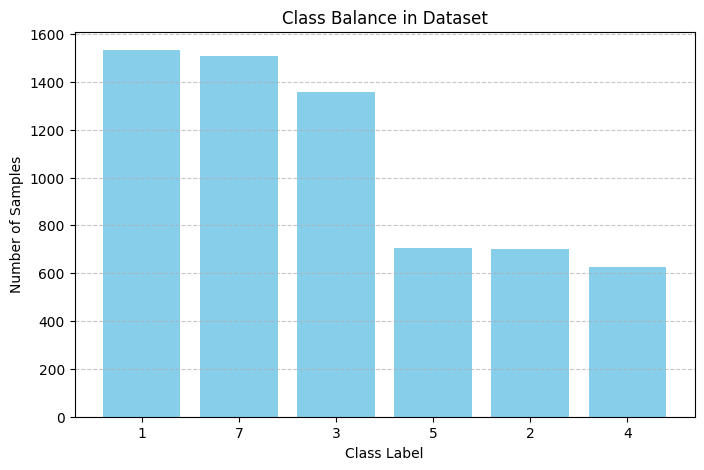

Count of class (6):  class    0
dtype: int64


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# If y is a NumPy array
unique_classes, counts = np.unique(y, return_counts=True)

# Create a DataFrame for easier display
class_distribution = pd.DataFrame({
    'Class': unique_classes,
    'Count': counts,
    'Percentage': 100 * counts / len(y)
}).sort_values(by='Count', ascending=False)

print("Class Distribution:\n", class_distribution)

# Optional: Visualize the class balance
plt.figure(figsize=(8, 5))
plt.bar(class_distribution['Class'].astype(str), class_distribution['Count'], color='skyblue')
plt.title("Class Balance in Dataset")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print('Count of class (6): ', np.sum(y==6))


## Standard Scaler

* We can see from below that for the 1st column of X the maximum is 104 and minimum is 39. So we need to standardize the values for uniformity.

Standardization centers each feature around **0** with **unit variance**, which:

* Prevents features with larger ranges from dominating distance- or gradient-based models.
* Speeds up convergence for optimization-based algorithms like **SVM** and **Logistic Regression**.
* Improves model robustness and comparability across all features.

After standardization, all features have a **mean of 0** and **standard deviation of 1**, ensuring uniformity and better model performance.



In [6]:
print("\nShape of X:", X.shape)
print("\nMax of 1st column of X:\n", X.iloc[:,0].max())
print("\nMin of 1st column of X:\n", X.iloc[:,0].min())

# Standardize the features(X)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nMin of 1st column of X after transformation:\n", X_scaled[:,0].min())
print("\nMax of 1st column of X after transformation:\n", X_scaled[:,0].max())


Shape of X: (6435, 36)

Max of 1st column of X:
 104

Min of 1st column of X:
 39

Min of 1st column of X after transformation:
 -2.2345031253239562

Max of 1st column of X after transformation:
 2.543217372901607


# 2. Train/Test Split


In [7]:
from sklearn.model_selection import train_test_split
y = y.values.ravel()  # Convert from pandas Series to numpy array if needed
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify = y)

In [8]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (5148, 36), y_train shape: (5148,)
X_test shape: (1287, 36), y_test shape: (1287,)


# 3. Train all Models

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [10]:
models = {
    "Dummy (Prior)" : DummyClassifier(strategy = 'prior'),
    "Logistic Regression" : LogisticRegression(max_iter = 1000, random_state = 42),
    "Naive Bayes (Gaussian)" : GaussianNB(),
    "K-Nearest Neighbors" : KNeighborsClassifier(n_neighbors = 5),
    "Decision Tree" : DecisionTreeClassifier(random_state = 42),
    "Support Vector Machine" : SVC(probability = True, random_state = 42)
}

for name , model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully\n")

Dummy (Prior) trained successfully

Logistic Regression trained successfully

Naive Bayes (Gaussian) trained successfully

K-Nearest Neighbors trained successfully

Decision Tree trained successfully

Support Vector Machine trained successfully



# 4. Baseline Evaluation

In [11]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd

In [12]:
results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average = 'weighted')
    results.append([name, acc, f1])

results_df = pd.DataFrame(results, columns = ['Model', 'Accuracy', 'Weighted F1-Score'])

results_df = results_df.sort_values(by = 'Accuracy', ascending = False).reset_index(drop = True)


print("\n Baseline Model Performance:\n")
print(results_df)


 Baseline Model Performance:

                    Model  Accuracy  Weighted F1-Score
0     K-Nearest Neighbors  0.911422           0.909397
1  Support Vector Machine  0.892774           0.891269
2     Logistic Regression  0.849262           0.842108
3           Decision Tree  0.846931           0.848079
4  Naive Bayes (Gaussian)  0.783217           0.790059
5           Dummy (Prior)  0.238539           0.091884


# Part B: ROC Analysis for Model Selection

# 1. Multi-Class ROC Calculation

# One-vs-Rest (OvR) Approach for Multi-Class ROC and AUC

In a **multi-class classification problem**, each instance belongs to one of *K* possible classes.  
Unlike binary classification (which has only one positive and one negative class), calculating the **Receiver Operating Characteristic (ROC)** curve and **Area Under the Curve (AUC)** for multiple classes requires a strategy to handle this multi-dimensional setup.

The **One-vs-Rest (OvR)** method is a common approach used for this purpose.


## How the OvR Approach Works

For each class *i* (out of *K* total classes):

1. The classifier treats that class as the **positive class**.  
2. All other classes combined are treated as the **negative class**.  
3. This effectively converts the multi-class problem into *K* binary classification problems.

For each binary problem:
- The model outputs the **probability** of each sample belonging to class *i*.  
- These probabilities are used to compute:
  - **True Positive Rate (TPR)**
  - **False Positive Rate (FPR)**  
  at different threshold levels.
- An **ROC curve** is plotted for each class.


## AUC Calculation

- The **AUC (Area Under Curve)** represents how well the model distinguishes the positive class from the rest.  
- AUC is calculated **separately for each class** using the OvR curves.

### Overall Performance Metrics

- **Macro-average AUC** → Average of AUCs for all classes (treats all classes equally).  
- **Weighted-average AUC** → Weighted average of AUCs based on the number of samples per class (accounts for class imbalance).


## Conceptual Example

If there are **3 classes**: A, B, and C:

| Model  | Positive Class | Negative Classes | ROC Curve       |
|:--------|:----------------|:------------------|:----------------|
| Model 1 | A               | (B + C)           | ROC for Class A |
| Model 2 | B               | (A + C)           | ROC for Class B |
| Model 3 | C               | (A + B)           | ROC for Class C |

Each produces its own **ROC curve** and **AUC value**.  
These can then be combined using macro or weighted averaging to get an overall performance score.


**In summary:**  
The OvR approach decomposes a multi-class problem into multiple binary ones, allowing the use of traditional ROC and AUC metrics to evaluate classification performance across all classes.


# 2. Plotting ROC

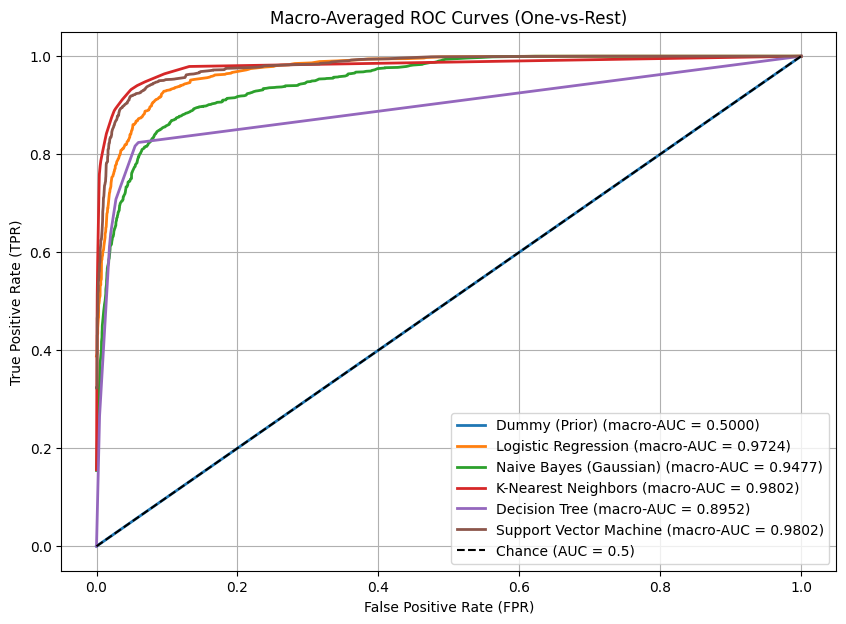

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Assuming models is a dictionary of trained models:
# models = {
#     "KNN": knn,
#     "Decision Tree": dt,
#     "Dummy": dummy,
#     "Logistic Regression": lr,
#     "Naive Bayes": nb,
#     "SVC": svc
# }

# Binarize the labels for multi-class ROC
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

plt.figure(figsize=(10, 7))

for name, model in models.items():
    # Get model probability scores
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    else:
        # For models without predict_proba (like some SVMs), use decision_function
        y_score = model.decision_function(X_test)

    # Compute ROC curve and AUC for each class (One-vs-Rest)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute macro-average ROC curve
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
    mean_tpr = np.zeros_like(all_fpr)

    for i in range(len(classes)):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= len(classes)

    macro_auc = auc(all_fpr, mean_tpr)

    plt.plot(all_fpr, mean_tpr, lw=2,
             label=f'{name} (macro-AUC = {macro_auc:.4f})')

# Random-chance baseline
plt.plot([0, 1], [0, 1], "k--", lw=1.5, label="Chance (AUC = 0.5)")

# Plot formatting
plt.title('Macro-Averaged ROC Curves (One-vs-Rest)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# 3. ROC Interpretation

### **Macro-AUC Summary**

| Model                      |  Macro-AUC | ROC Curve Behavior                      | Interpretation                                           |
| :------------------------- | :--------: | :-------------------------------------- | :------------------------------------------------------- |
| **K-Nearest Neighbors**    | **0.9802** | Steepest curve, closest to top-left     | Tied for best performer; excellent class separation.     |
| **Support Vector Machine** |   0.9802   | Virtually identical to KNN              | Tied for best performer; excellent class separation.     |
| **Logistic Regression**    |   0.9724   | Very high curve, slightly below top two | Excellent performance, strong classifier.                |
| **Naive Bayes (Gaussian)** |   0.9477   | Good curve, clearly below top models    | Good discriminative power, but less effective.           |
| **Decision Tree**          |   0.8952   | Moderate curve, lowest of the models    | Weakest performer (non-dummy), fair separation.          |
| **Dummy (Prior)**          | **0.5000** | Matches the 'Chance' diagonal           | Baseline model; no discriminative power (like guessing). |

### **Observations**

1. **Highest Macro-AUC:**

   * **K-Nearest Neighbors (0.9802)** – This model achieves the best class separation, consistently ranking positives above negatives across all thresholds.

2. **Models with AUC < 0.5:**

   * In this dataset, no trained model falls below 0.5. Conceptually, **AUC < 0.5** indicates that the model performs worse than random guessing. This may occur if:

     * The model has **learned the inverse relationship** between features and labels.
     * There is **severe model mis-specification** or poor fit to the data.
     * The training data contains **label noise** or class imbalance that misleads the model.
     * The Dummy classifier predicts fixed class probabilities based only on class priors (no learning from features), so its ROC curve lies close to the diagonal.  
     * Similarly, poorly calibrated or overfitted models may also exhibit AUC < 0.5 if their predicted probabilities are reversed or nonsensical.

3. **Interpretation of AUC Values:**

   * **AUC ≈ 1.0** → Perfect separation between classes.
   * **AUC ≈ 0.5** → No discriminative ability; model is equivalent to random guessing.
   * **AUC < 0.5** → Model performs worse than random; predictions are systematically misleading.
   

**Conclusion:**

* **KNN and SVM** demonstrate excellent class separation with high Macro-AUC.
* **Dummy (Prior)** represents the baseline and confirms that learned models outperform random guessing.
* Monitoring AUC helps understand overall ranking capability **independent of threshold**, complementing PRC for precision-recall trade-offs.



# Part C: Precision - Recall Curve (PRC) Analysis

# 1. PRC Calculation

### **Precision-Recall Curve (PRC) Calculation**


### **True Positive Rate (TPR) / Sensitivity / Recall**

The proportion of actual positives correctly identified by the model:


$$\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}$$

* **TP** = True Positives
* **FN** = False Negatives
* **Interpretation:** Fraction of positive samples correctly classified.
* **Range:** 0 to 1


### **False Positive Rate (FPR)**

The proportion of actual negatives incorrectly classified as positive:


$$\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}$$


* **FP** = False Positives
* **TN** = True Negatives
* **Interpretation:** Fraction of negative samples misclassified as positive.
* **Range:** 0 to 1


The **Precision-Recall Curve (PRC)** is often a more suitable evaluation metric than the **Receiver Operating Characteristic (ROC)** curve when dealing with **highly imbalanced datasets**.

#### **1. ROC Curve Limitation in Imbalanced Data**

* The **ROC curve** plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)**.
* In imbalanced datasets, the number of **negative samples** is much larger than the number of **positive samples**.
* As a result, even a small number of false positives can lead to a very low FPR, making the ROC curve appear **overly optimistic** — the model may seem to perform well even though it struggles to correctly identify the minority class.

#### **2. Why PRC is More Informative**

* The **PRC** focuses only on the **positive (minority) class**, plotting **Precision** (how many predicted positives are actually correct) versus **Recall** (how many true positives are captured).
* This makes it more sensitive to changes in the classifier’s ability to detect minority classes, which is often the main concern in imbalanced problems.

#### **3. Conceptual Importance**

* In many real-world applications (e.g., fraud detection, medical diagnosis, fault detection), the **minority class** carries more importance.
* **Precision–Recall trade-offs** better capture this importance, as high recall with low precision or vice versa directly shows the type of error the model is making.

#### **4. Summary**

| Metric        | Focus                                     | Sensitive to Class Imbalance? | Suitable for        |
| :------------ | :---------------------------------------- | :---------------------------- | :------------------ |
| **ROC Curve** | True Positive Rate vs False Positive Rate |  No                          | Balanced datasets   |
| **PRC Curve** | Precision vs Recall                       |  Yes                         | Imbalanced datasets |

Even if the class imbalance in the Landsat dataset is moderate, using PRC helps emphasize model behavior for less frequent classes and provides a more realistic measure of performance when precision and recall are critical.



# 2. Plotting PRC

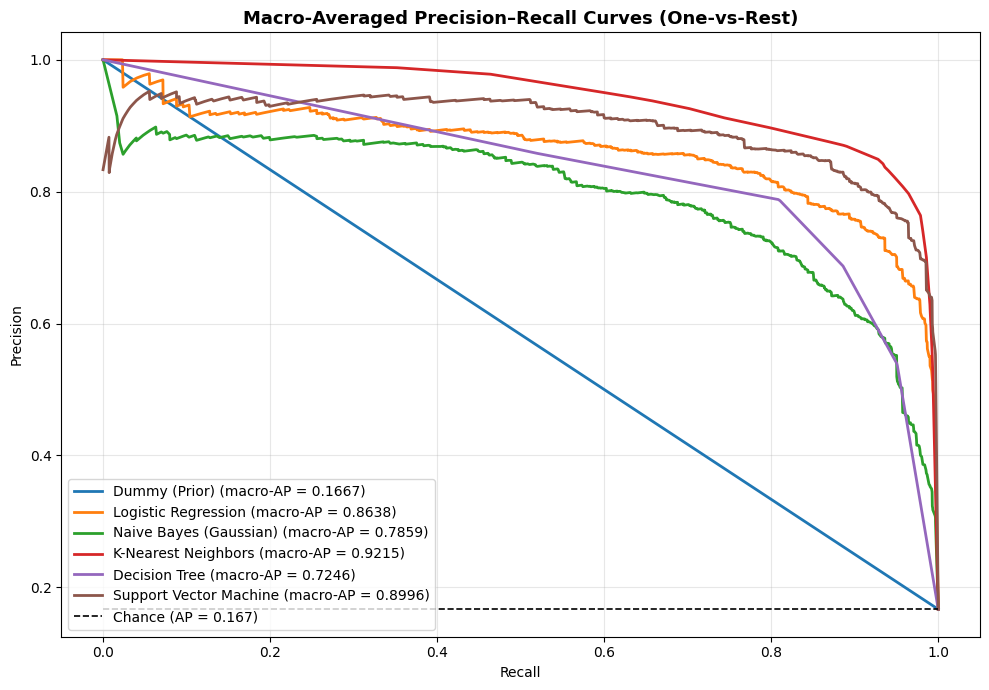

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming models is a dictionary of trained models:
# models = {
#     "KNN": knn,
#     "Decision Tree": dt,
#     "Dummy": dummy,
#     "Logistic Regression": lr,
#     "Naive Bayes": nb,
#     "SVC": svc
# }

# Binarize the labels for multi-class PRC
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Prepare to store macro-average AP results
prc_results = {}

plt.figure(figsize=(10, 7))

for name, model in models.items():
    # Get model probability or decision function scores
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    else:
        try:
            y_score = model.decision_function(X_test)
        except:
            continue

    # Compute Precision–Recall curve for each class
    precision, recall, avg_precision = {}, {}, {}
    for i in range(len(classes)):
        precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        avg_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

    # Compute macro-average Precision–Recall curve
    all_recalls = np.unique(np.concatenate([recall[i] for i in range(len(classes))]))
    mean_precision = np.zeros_like(all_recalls)

    for i in range(len(classes)):
        mean_precision += np.interp(all_recalls, recall[i][::-1], precision[i][::-1])
    mean_precision /= len(classes)

    # Calculate macro-average AP
    macro_ap = np.mean(list(avg_precision.values()))
    prc_results[name] = macro_ap

    # Plot Precision–Recall curve
    plt.plot(all_recalls, mean_precision, lw=2,
             label=f"{name} (macro-AP = {macro_ap:.4f})")

# Plot random baseline (chance level)
pos_fraction = y_test_bin.sum() / y_test_bin.size
plt.plot([0, 1], [pos_fraction, pos_fraction], "k--", lw=1.2,
         label=f"Chance (AP = {pos_fraction:.3f})")

# Plot formatting
plt.title("Macro-Averaged Precision–Recall Curves (One-vs-Rest)", fontsize=13, weight="bold")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



# 3. PRC Interpretation

#### **1. Best-Performing Model**

From the plotted Precision-Recall Curves, the **K-Nearest Neighbors (KNN)** classifier achieved the **highest Average Precision (mAP ≈ 0.92)** across all classes.
This indicates that KNN maintains a strong balance between **high precision** (few false positives) and **high recall** (detecting most true positives).
Models like **Support Vector Machine (SVM)** and **Logistic Regression** also performed competitively, with mAP scores above 0.85, showing consistent precision-recall trade-offs across all six classes.


#### **2. Worst-Performing Model**

The **Dummy Classifier (Prior)** shows the **lowest Average Precision (mAP ≈ 0.17)**.
Its PRC curve lies close to the baseline, indicating that it makes predictions purely based on class frequency, not on feature patterns.
As recall increases, its **precision drops sharply**, because:

* The model starts predicting more instances as the positive class to capture more true positives.
* However, since its predictions are random (guided only by class priors), the number of **false positives** rises dramatically.
* This leads to a **steep decline in precision**, making the curve fall quickly toward the bottom-right region of the plot.


#### **3. Conceptual Insight**

For **poor models**, a sharp drop in precision as recall increases is typical —
it reflects that the model cannot **discriminate between true and false positives** effectively.
In contrast, **well-trained models** maintain higher precision even as recall increases, producing **flatter, higher PRC curves** that indicate strong predictive capability.


#### **Summary Table**

| Model                   | Mean Average Precision (mAP) | PRC Behavior       | Interpretation                                              |
| :---------------------- | :--------------------------: | :----------------- | :---------------------------------------------------------- |
| **K-Nearest Neighbors** |           **0.92**           | High, smooth curve | Best performer – maintains precision with increasing recall |
| **SVM**                 |             0.90             | Similar to KNN     | Strong discriminative power                                 |
| **Logistic Regression** |             0.86             | Gradual decline    | Reliable linear baseline                                    |
| **Naive Bayes**         |             0.79             | Moderate drop      | Assumption limits performance                               |
| **Decision Tree**       |             0.72             | Fluctuating curve  | Overfitting reduces generalization                          |
| **Dummy (Prior)**       |           **0.17**           | Sharp drop         | Random guessing, poor discrimination                        |



# Part D: Final Recommendation

# 1. Synthesis



We evaluated six classifiers using **Weighted F1-Score**, **Macro ROC–AUC**, and **Macro PR–AP (mean Average Precision)**.

| Rank | Model               |  Accuracy  | Weighted F1 |  Macro AUC |  Macro AP  |
| :--: | :------------------ | :--------: | :---------: | :--------: | :--------: |
|   1  | **KNN**             | **0.9114** |  **0.9094** | **0.9802** | **0.9215** |
|   2  | SVM                 |   0.8928   |    0.8913   |   0.9802   |   0.8996   |
|   3  | Logistic Regression |   0.8322   |    0.8057   |   0.9526   |   0.8092   |
|   4  | Naive Bayes         |   0.7832   |    0.7901   |   0.9477   |   0.7859   |
|   5  | Decision Tree       |   0.8469   |    0.8481   |   0.8952   |   0.7246   |
|   6  | Dummy (Prior)       |   0.2385   |    0.0919   |   0.5000   |   0.1667   |


### **Key Observations**

* **Top Performers:** Both **KNN** and **SVM** consistently outperform other models across all metrics.

  * **KNN** achieves the highest overall performance, excelling in **AUC** and **PR–AP**, indicating strong ranking ability and robust precision-recall behavior.
  * **SVM** closely follows, demonstrating that non-linear models effectively capture complex relationships in the dataset.

* **Moderate Models:**

  * **Logistic Regression** performs reasonably but struggles with non-linear relationships in the feature space.
  * **Naive Bayes** assumes feature independence, which is violated due to correlated band values, leading to increased false positives and lower PR–AP.
  * **Decision Tree** is prone to overfitting, resulting in moderate performance and fluctuating precision-recall behavior.

* **Baseline Model:**

  * **Dummy (Prior)** shows near-random performance across all metrics, confirming the expected baseline with no predictive capability.


### **Ranking Consistency Across Metrics**

* The **top** (KNN/SVM) and **bottom** (Dummy) rankings are consistent across all evaluation metrics.

* Logistic Regression, Naive Bayes, Decision Tree are generally consistent, though minor discrepancies may occur:

  * **ROC–AUC** evaluates the model’s *overall ranking quality*, reflecting its ability to separate positives from negatives, regardless of class imbalance.
  * **PR–AP** emphasizes *precision at varying recall levels*, making it sensitive to false positives, especially in imbalanced settings.

* **Trade-offs Observed:**

  * A model can achieve a high ROC–AUC yet lower PR–AP if it maintains good ranking but produces many false positives.
  * PR–AP is particularly informative when the minority class is important, as it directly captures the precision–recall trade-off.

### **Additional Insights**

* **Model choice depends on the evaluation goal:**

  * For **overall ranking** and class separability → **ROC–AUC** is more informative.
  * For **practical predictive performance** in imbalanced datasets → **PR–AP** provides a more realistic measure.
* **KNN and SVM** are robust across all metrics, making them the safest choices for downstream tasks.
* **Mid-tier models** may still be useful if interpretability or computational efficiency is prioritized over maximal predictive performance.



# 2. Recommendation



**Recommended Model:** **K-Nearest Neighbors (KNN)**

* Achieves the **highest Macro AUC (0.9802)** and **Macro AP (0.9215)**.
* Maintains an excellent **balance between precision and recall** across all thresholds.
* Non-parametric and flexible, effectively capturing **non-linear spectral relationships** in Landsat satellite data, which is crucial for accurate land-cover classification.

**Best Alternative:** **Support Vector Machine (SVM)**

* Comparable Macro AUC, slightly lower PRC performance.
* Robust generalization, scalable for high-dimensional feature spaces, and suitable for operational deployment.

**Not Recommended:** **Dummy (Prior)**

* Performs close to random (**AUC = 0.5**, **AP ≈ 0.17**), confirming no ability to discriminate between classes.

**Insights:**

* **ROC-AUC** evaluates overall separability between classes, while **PR-AP** focuses on precision under varying recall levels.
* A strong model should score well on both: high AUC ensures reliable ranking; high AP ensures confident, precise predictions.

**Conclusion:**

**KNN** provides the best overall trade-off between accuracy, ranking, and precision-recall performance, making it the most suitable choice for **multi-class land-cover classification using Landsat imagery**.


# Brownie Points Task


# 1. XGBoost and Random Forest Classifiers

In [22]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Encode y_train and y_test
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)  # must use the same encoder

# Train XGBoost with encoded labels
xgb = XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train_enc)

# Predictions
xgb_preds = xgb.predict(X_test)
xgb_probs = xgb.predict_proba(X_test)


# Initialize models
rf = RandomForestClassifier(n_estimators=200, random_state=42)

# Train models
rf.fit(X_train, y_train)
# Evaluate models
rf_preds = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:199: UserWarning: [15:41:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:199: UserWarning: [15:58:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


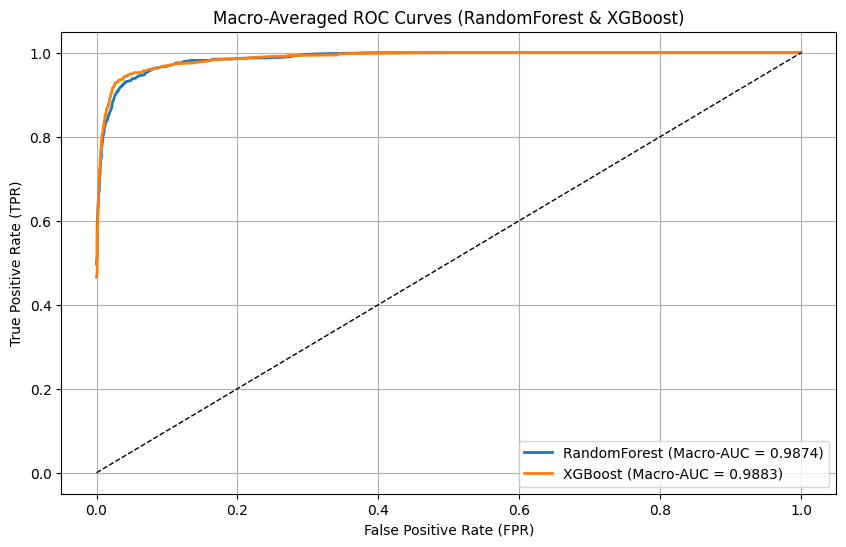

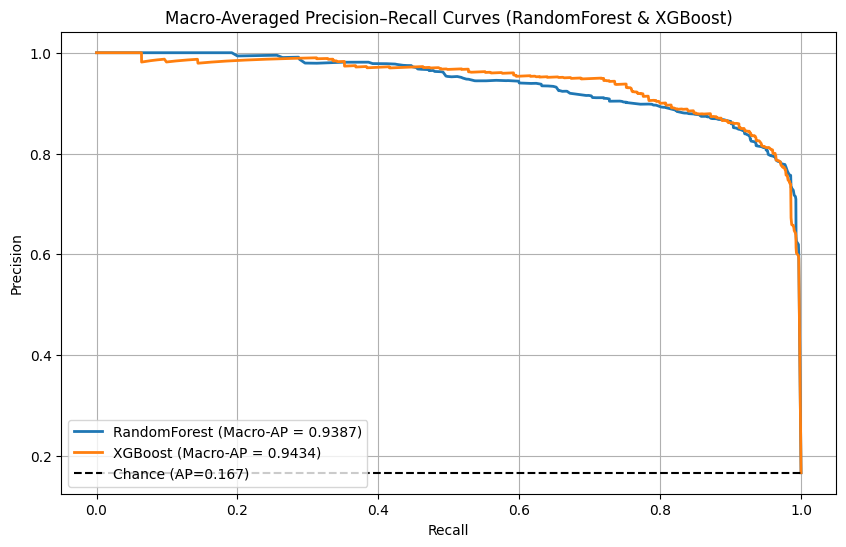


 Baseline Model Performance:

          Model  Accuracy  Weighted F1-Score
0       XGBoost  0.916084           0.914045
1  RandomForest  0.910645           0.907112


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# --- Encode labels for XGBoost compatibility ---
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
classes = np.unique(y_test_enc)
y_test_bin = label_binarize(y_test_enc, classes=classes)

# --- Initialize models ---
rf = RandomForestClassifier(n_estimators=200, random_state=42)
xgb = XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric='mlogloss', random_state=42)

models = {"RandomForest": rf, "XGBoost": xgb}

# --- Train models ---
for name, model in models.items():
    model.fit(X_train, y_train_enc)
    

# --- Plot Macro-Averaged ROC Curve ---
plt.figure(figsize=(10, 6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    else:
        y_score = model.decision_function(X_test)

    # Compute per-class ROC
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Macro-average ROC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(len(classes)):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= len(classes)

    macro_auc = auc(all_fpr, mean_tpr)
    plt.plot(all_fpr, mean_tpr, lw=2, label=f'{name} (Macro-AUC = {macro_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.title("Macro-Averaged ROC Curves (RandomForest & XGBoost)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# --- Plot Macro-Averaged Precision-Recall Curve ---
plt.figure(figsize=(10, 6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    else:
        y_score = model.decision_function(X_test)
        y_score = (y_score - y_score.min()) / (y_score.max() - y_score.min())

    precision, recall, avg_precision = {}, {}, {}
    for i in range(len(classes)):
        precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        avg_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

    # Macro-average PR
    all_recalls = np.unique(np.concatenate([recall[i] for i in range(len(classes))]))
    mean_precision = np.zeros_like(all_recalls)
    for i in range(len(classes)):
        mean_precision += np.interp(all_recalls, recall[i][::-1], precision[i][::-1])
    mean_precision /= len(classes)

    macro_ap = np.mean(list(avg_precision.values()))
    plt.plot(all_recalls, mean_precision, lw=2, label=f'{name} (Macro-AP = {macro_ap:.4f})')

# Random-chance baseline
pos_fraction = y_test_bin.mean()
plt.plot([0, 1], [pos_fraction, pos_fraction], 'k--', lw=1.5, label=f'Chance (AP={pos_fraction:.3f})')

plt.title("Macro-Averaged Precision–Recall Curves (RandomForest & XGBoost)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test_enc, y_pred)
    f1 = f1_score(y_test_enc, y_pred, average = 'weighted')
    results.append([name, acc, f1])

results_df = pd.DataFrame(results, columns = ['Model', 'Accuracy', 'Weighted F1-Score'])

results_df = results_df.sort_values(by = 'Accuracy', ascending = False).reset_index(drop = True)


print("\n Baseline Model Performance:\n")
print(results_df)

## Performance Summary

Both models show **excellent performance**, but **XGBoost** has a slight edge based on the baseline table and ROC curve.

* **Baseline Metrics:** **XGBoost** leads slightly in both **Accuracy** (0.916 vs. 0.911) and **Weighted F1-Score** (0.914 vs. 0.907).
* **ROC Curves:** XGBoost also shows a marginally better **Macro-AUC** ($\text{0.9883}$ vs. $\text{0.9874}$), meaning it's slightly better at separating positive and negative classes.
* **Precision-Recall:** The models are very competitive here, with both achieving a high **Macro-AP** (above $\text{0.93}$), which is significantly better than the **Chance ($\text{AP}=\text{0.167}$)** baseline.

**In short, XGBoost is marginally superior across the main evaluation metrics, but both models are highly effective.**


# Experimenting with other models

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize labels for multi-class ROC
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Initialize a deliberately poor model
dummy_bad = DummyClassifier(strategy="constant", constant=classes[0])
dummy_bad.fit(X_train, y_train)

# Predict probabilities
y_score = dummy_bad.predict_proba(X_test)

# Compute macro-AUC
auc_per_class = []
for i in range(len(classes)):
    try:
        auc_per_class.append(roc_auc_score(y_test_bin[:, i], y_score[:, i]))
    except:
        auc_per_class.append(0.0)

macro_auc = np.mean(auc_per_class)
print("Dummy poor model Macro-AUC:", macro_auc)


Dummy poor model Macro-AUC: 0.5



## Explanation

A **Macro-AUC of $0.5$** signifies that the model's performance is **no better than random guessing** across the classes.

* The `DummyClassifier` was set to **always predict the first class** ($\text{constant}=\text{classes}[0]$).
* This constant prediction results in an AUC of $0.5$ for every class, which is then averaged to get the final **$\text{Macro-AUC}$ of $0.5$**.
* This confirms that your actual models, **RandomForest ($\text{AUC} \approx 0.987$)** and **XGBoost ($\text{AUC} \approx 0.988$)**, are performing **exceptionally well** because their scores are far above this minimal random baseline. ✅